In [1]:
import pandas as pd
import numpy as np

!pip matplotlib==3.4.3
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

! pip install xgboost
from dython.nominal import associations
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

! pip install imblearn
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

ERROR: unknown command "matplotlib==3.4.3"



In [2]:
#Train Data
train = pd.read_csv("application_train.csv")

In [3]:
#Looking the shape of data
train.shape

(307511, 122)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- Ada 65 Feature bertipe float
- Ada 41 Feature bertipe integer
- Ada 16 Feature bertipe object

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


train.select_dtypes(include=['object']).describe().T

In [6]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
train.select_dtypes(include=['object']).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [8]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [9]:
train.select_dtypes(include=['integer']).columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [10]:
train.select_dtypes(include=['float']).columns.tolist()

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [11]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
#Mengecek data duplikat
train.duplicated().sum()

0

## EDA

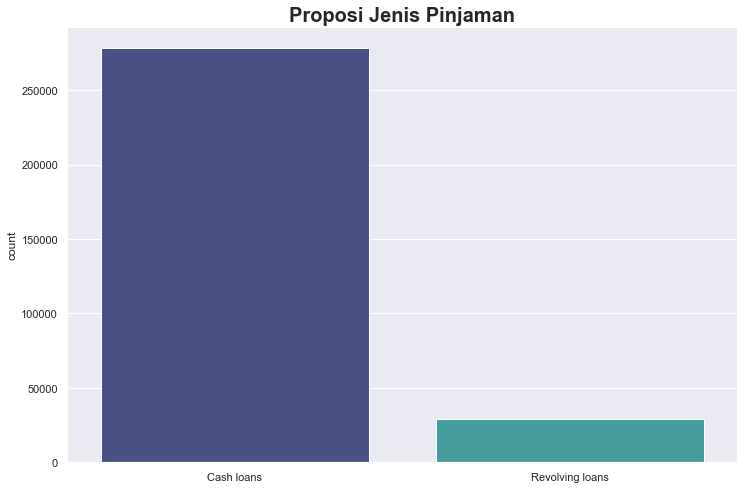

Cash loans         90.48%
Revolving loans     9.52%
Name: NAME_CONTRACT_TYPE, dtype: object


In [13]:
# jenis pinjaman yang dipinjam oleh Peminjam

plt.figure(figsize=(12,8))
plt.title("Proposi Jenis Pinjaman",fontsize=20,weight="bold")
sns.countplot(train.NAME_CONTRACT_TYPE.values,data=train,palette='mako')
plt.show()

value_counts = train['NAME_CONTRACT_TYPE'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Cash loans =  kredit yang berupa penyediaan dana tunai yang dipindahbukukan ke rekening nasabah untuk digunakan sesuai dengan tujuan kreditnya.
Revolving Loans =  kredit untuk pembiayaan modal kerja yang bersifat permanen, yang jumlahnya tercermin dalam cash flow perusahaan.

Kebanyakan peminjam meminjam uang dengan tipe pinjaman Cash loans.

In [14]:
train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

terlihat kode gender yang ada cukup awam, karena terdapat 3 kategorik

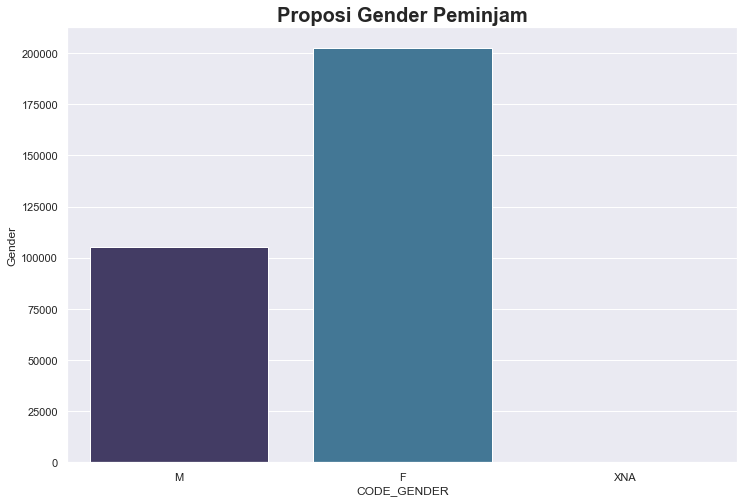

F      65.83%
M      34.16%
XNA     0.00%
Name: CODE_GENDER, dtype: object


In [15]:
plt.figure(figsize=(12,8))
plt.title("Proposi Gender Peminjam",fontsize=20,weight="bold")
sns.countplot(x= "CODE_GENDER", data = train, palette = "mako")
plt.ylabel("Gender")
plt.show()

value_counts = train['CODE_GENDER'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Peminjam Perempuan lebih banyak dari pada laki-laki

0    91.93%
1     8.07%
Name: TARGET, dtype: object


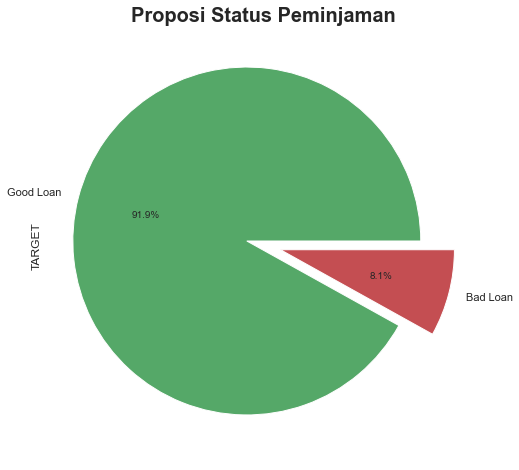

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Proposi Status Peminjaman",fontsize=20,weight="bold")
train["TARGET"].value_counts().plot.pie(explode=[0.1,0.1],labels=["Good Loan","Bad Loan"], autopct='%1.1f%%',colors=["g","r"]);

value_counts = train["TARGET"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

"1" menunjukkan klien dengan kesulitan pembayaran: peminjam memiliki keterlambatan pembayaran (pinjaman belum terbayarkan), sedangkan  "0" pinjaman lunas.


dapat dilihat dengan jelas bahwasannya kebanyakan peminjam telah mengembalikan uang pinjamannya, namun  feature targetnya mengalami imbalanced data.

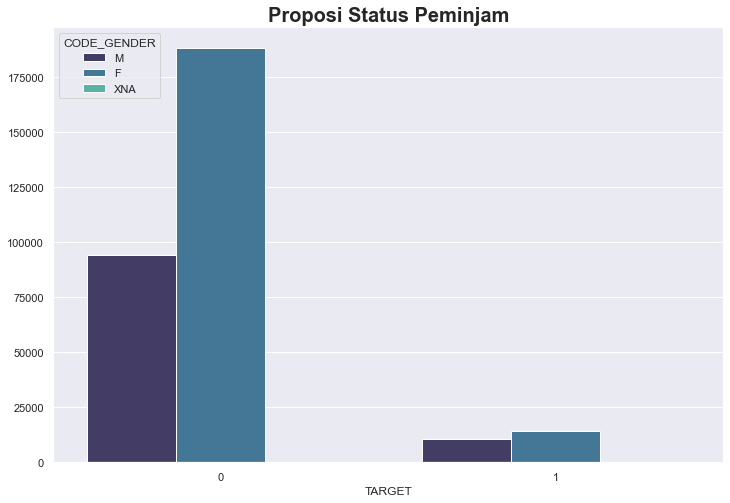

In [17]:
plt.figure(figsize=(12,8))
plt.title("Proposi Status Peminjam",fontsize=20,weight="bold")
sns.countplot(data = train, x= "TARGET", hue = 'CODE_GENDER', palette = "mako")
plt.ylabel("")
plt.show()


Kreditur berjeneis kelamin perempuan cenderung kesulitan untuk membayarkan kembali pinjaman mereka, hal ini terjadi karena kebanyakan peminjam berjenis kelamin laki-laki

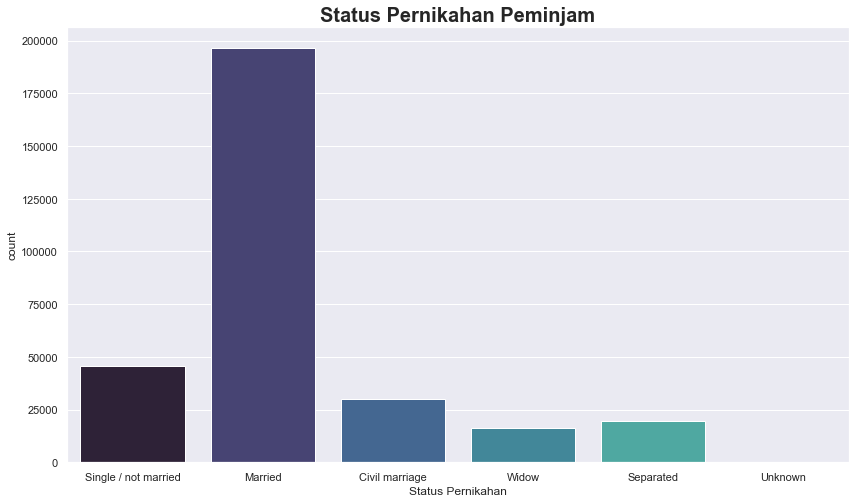



Married                 63.88%
Single / not married    14.78%
Civil marriage           9.68%
Separated                6.43%
Widow                    5.23%
Unknown                  0.00%
Name: NAME_FAMILY_STATUS, dtype: object


In [18]:
# Status pernikahan peminjam?

plt.figure(figsize=(14,8))
plt.title("Status Pernikahan Peminjam",fontsize=20,weight="bold")
sns.countplot(train.NAME_FAMILY_STATUS.values,data=train, palette= 'mako')
plt.xlabel("Status Pernikahan")
plt.show()

print('\n')
value_counts = train['NAME_FAMILY_STATUS'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Mostly peminjam sudah berstatus sebagai seorang yang sudah menikah, dapat diasusmsikan jika peminjam yang telat untuk membbayarkan pinjaman mereka dikarenakan 
harus mengeluarkan uangnya untuk kebutuhan rumah tangga mereka.

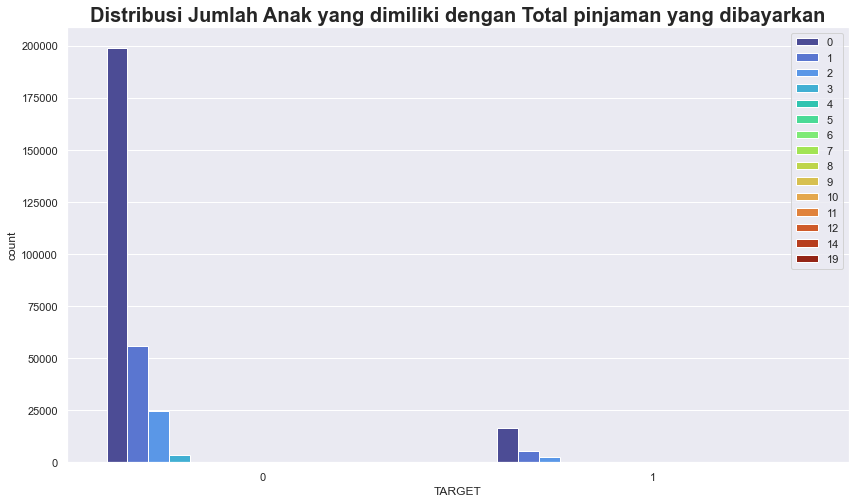

In [102]:
plt.figure(figsize=(14,8))
plt.title("Distribusi Jumlah Anak yang dimiliki dengan Total pinjaman yang dibayarkan",fontsize=20,weight="bold")
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=train,palette="turbo")
plt.legend(loc=1)

Kebanyakan peminjam yang tidak memiliki anak tidak mengalami kesulitan untuk membayar kembali pinjaman mereka, namun memiliki anak sangat terlihat memperhambat peminjam untuk membayarkan pinjamannya.

<AxesSubplot:xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

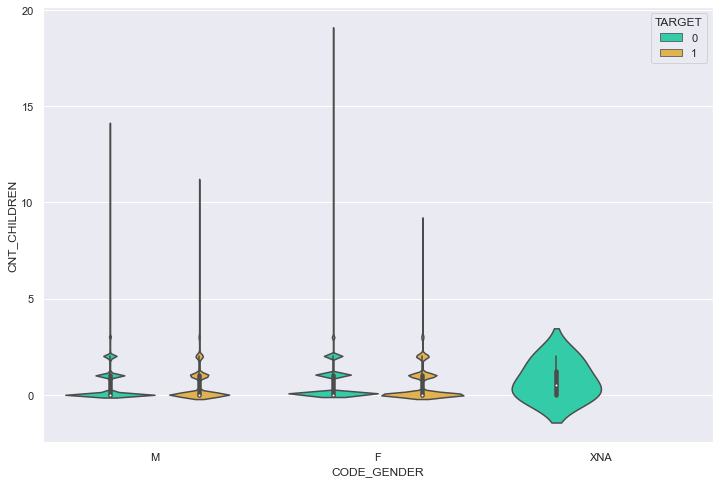

In [20]:
plt.figure(figsize=(12,8))
sns.violinplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=train,palette="turbo")

In [21]:
chilldern = train['CNT_CHILDREN'].value_counts()
print(chilldern)

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


kebanyakan peminjam tidak memiliki anak

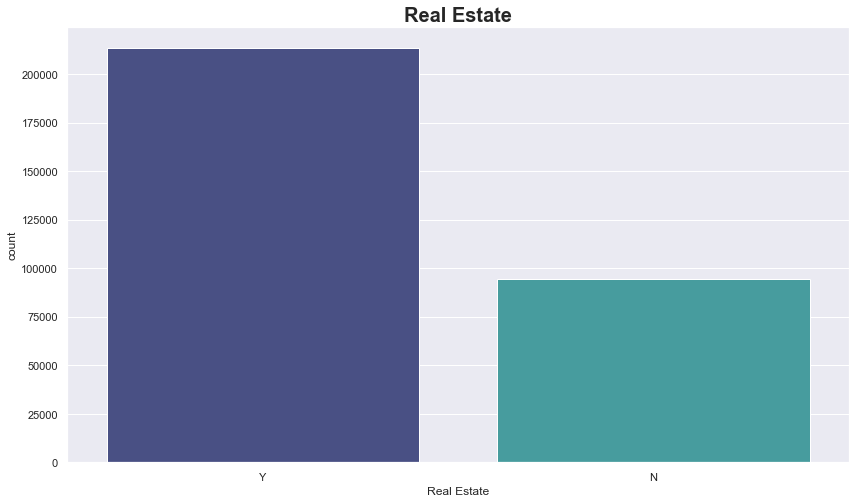

Y    69.37%
N    30.63%
Name: FLAG_OWN_REALTY, dtype: object


In [22]:
# REAL ESTATE
plt.figure(figsize=(14,8))
plt.title("Real Estate",fontsize=20,weight="bold")
sns.countplot(x= "FLAG_OWN_REALTY", data = train, palette = "mako")
plt.xlabel("Real Estate")
plt.show()

value_counts = train['FLAG_OWN_REALTY'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

69% peminjam memiliki Real Estate dan 31% dari peminjam tidak memiliki Real Estate

In [23]:
yes_kesusahan = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==1)])
yes_tidakkesusahan = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==0)])
no_kesusahan = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==1)])
no_tidakkesusahan = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==0)])

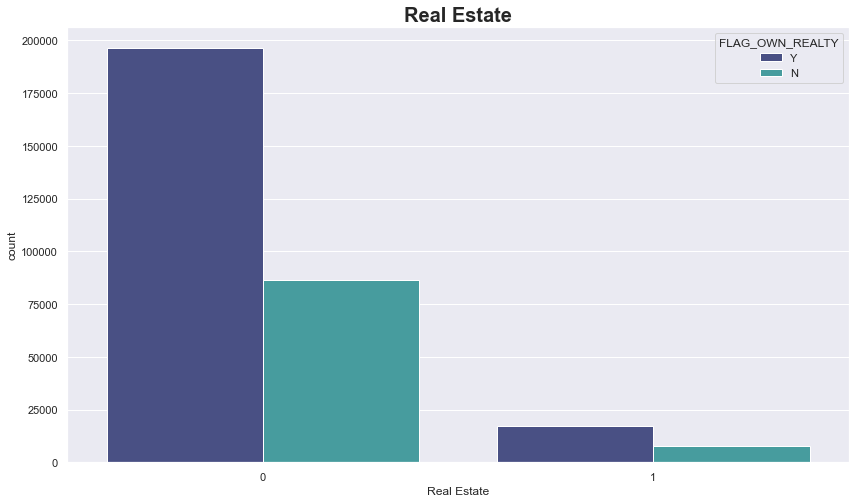

In [24]:
plt.figure(figsize=(14,8))
plt.title("Real Estate",fontsize=20,weight="bold")
sns.countplot(x= "TARGET", hue='FLAG_OWN_REALTY',data = train, palette = "mako")
plt.xlabel("Real Estate")
plt.show()


In [25]:
print("% Peminjam yang tidak Membayarkan Hutang yang Memiliki Realestate = ",100*yes_kesusahan/(yes_kesusahan+yes_tidakkesusahan))
print("% Peminjam yang tidak Membayarkan Hutang yang Tidak Memiliki Realestate  = ",100*no_kesusahan/(no_kesusahan+no_tidakkesusahan))

% Peminjam yang tidak Membayarkan Hutang yang Memiliki Realestate =  7.961577407740774
% Peminjam yang tidak Membayarkan Hutang yang Tidak Memiliki Realestate  =  8.324929139375152


Dapat dilihat jika peminjam yang tidak membayarkan hutangnya tidak memiliki real estate untuk dijadikan sebagai jaminan 

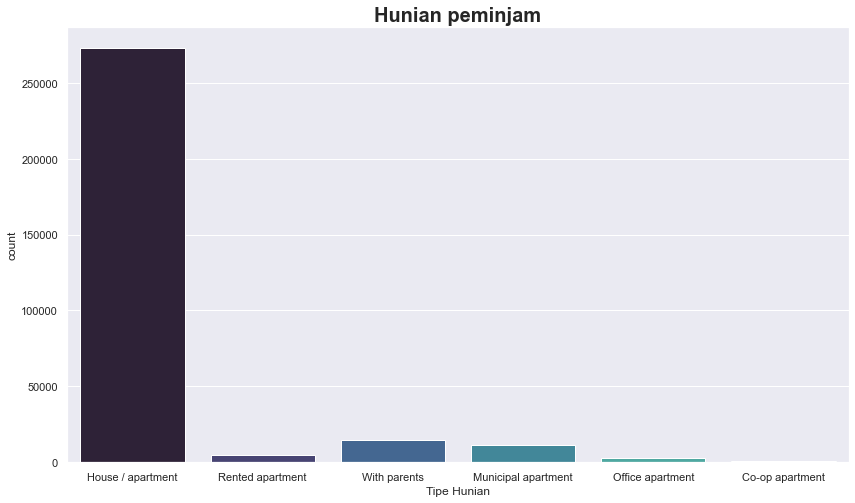



House / apartment      88.73%
With parents            4.83%
Municipal apartment     3.64%
Rented apartment        1.59%
Office apartment        0.85%
Co-op apartment         0.36%
Name: NAME_HOUSING_TYPE, dtype: object


In [26]:
#Tipe Hunian peminjam

plt.figure(figsize=(14,8))
plt.title("Hunian peminjam",fontsize=20,weight="bold")
sns.countplot(train.NAME_HOUSING_TYPE.values,data=train, palette='mako')
plt.xlabel("Tipe Hunian")
plt.show()

print('\n')
value_counts = train['NAME_HOUSING_TYPE'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Kebanyakan peminjam memiliki rumah/apartemen sendiri sebagai hunian mereka, hal ini membuktikan bahwa mungkin peminjam tidak mampu membayarkan pinjaman mereka karena peminjam harus membayarkan angsuran dari rumah/apartemen mereka

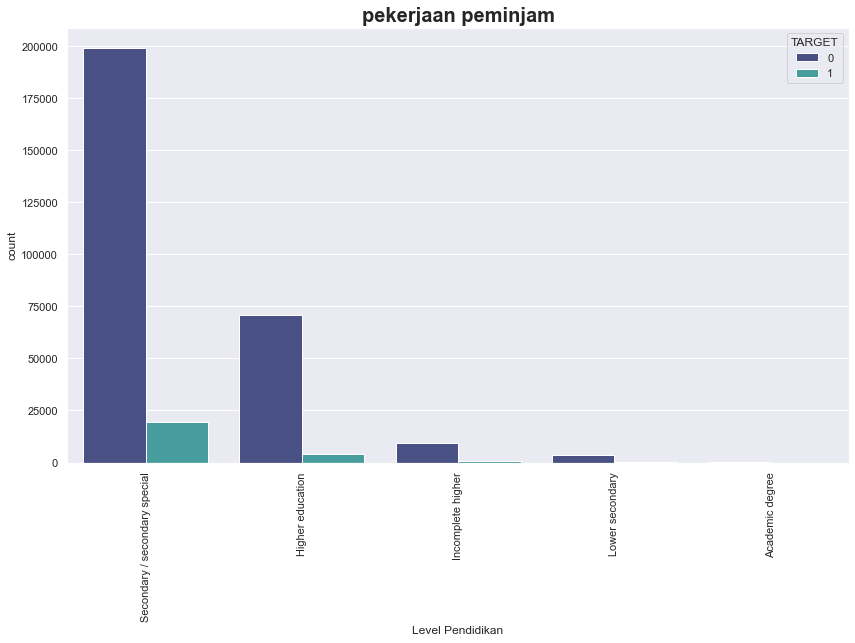



NAME_EDUCATION_TYPE            TARGET
Academic degree                0          0.05%
                               1          0.00%
Higher education               0         23.04%
                               1          1.30%
Incomplete higher              0          3.06%
                               1          0.28%
Lower secondary                0          1.11%
                               1          0.14%
Secondary / secondary special  0         64.67%
                               1          6.35%
Name: TARGET, dtype: object


In [27]:
# jenjang pendidikan terbanyak yang dimiliki oleh peminjam
plt.figure(figsize=(14,8))
plt.title("pekerjaan peminjam",fontsize=20,weight="bold")
pendidikan = sns.countplot(data=train, x='NAME_EDUCATION_TYPE', hue='TARGET',palette = "mako");
pendidikan.set_xticklabels(pendidikan.get_xticklabels(),rotation = 90);
plt.xlabel("Level Pendidikan")
plt.show()

print('\n')
value_counts = train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Tingkat pendidikan peminjam didominasi oleh tingkat pendidikan Secondary, dan kebanyakan peminjam dengan tingka pendidikan higher education dan secondary special dapat membayarkan pinjaman mereka

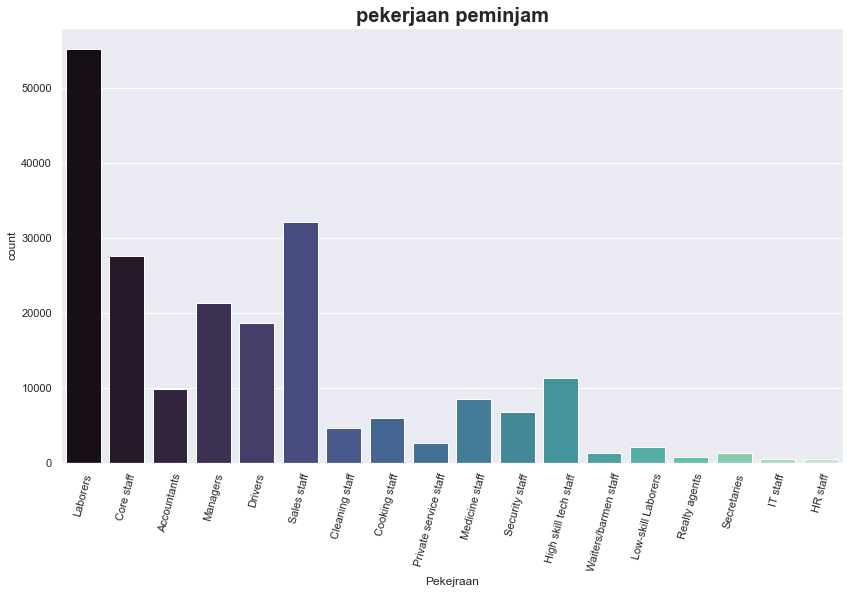

Laborers                 26.14%
Sales staff              15.21%
Core staff               13.06%
Managers                 10.12%
Drivers                   8.81%
High skill tech staff     5.39%
Accountants               4.65%
Medicine staff            4.04%
Security staff            3.18%
Cooking staff             2.82%
Cleaning staff            2.20%
Private service staff     1.26%
Low-skill Laborers        0.99%
Waiters/barmen staff      0.64%
Secretaries               0.62%
Realty agents             0.36%
HR staff                  0.27%
IT staff                  0.25%
Name: OCCUPATION_TYPE, dtype: object


In [28]:
plt.figure(figsize=(14,8))
plt.title("pekerjaan peminjam",fontsize=20,weight="bold")
sns.countplot(x= "OCCUPATION_TYPE", data = train, palette = "mako")
plt.xlabel("Pekejraan")
plt.xticks(rotation=75)
plt.show()

value_counts = train['OCCUPATION_TYPE'].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Kebanyakan peminjam berprofesi sebagai pekerja buruh, sedangkan peminjam terendah berasal dari profesi HR Staff

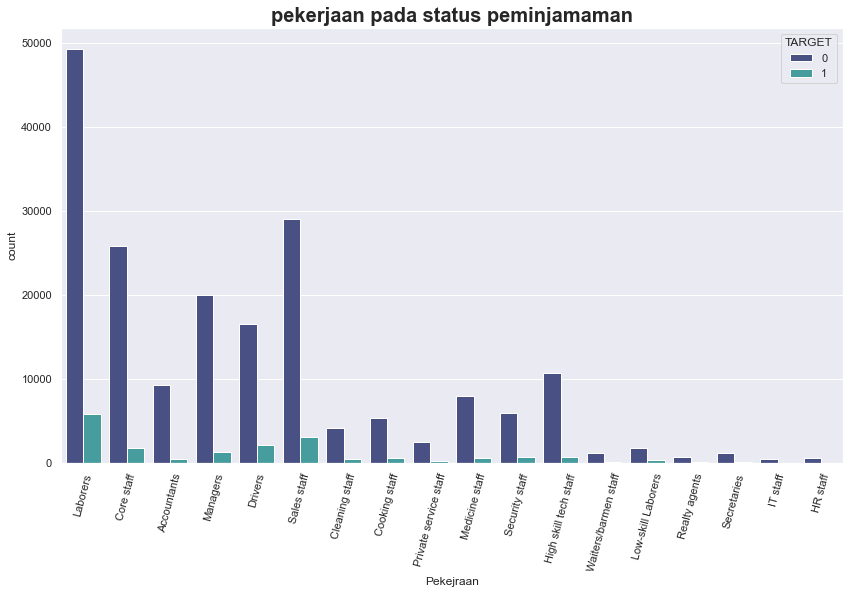

In [29]:
# profesi mana yang membayar pinjaman secara tepat waktu dan  lebih baik bagi perusahaan untuk meminjamkan uang?
plt.figure(figsize=(14,8))
plt.title("pekerjaan pada status peminjamaman",fontsize=20,weight="bold")
sns.countplot(x= "OCCUPATION_TYPE", hue = 'TARGET',data = train, palette = "mako")
plt.xlabel("Pekejraan")
plt.xticks(rotation=75)
plt.show()


Peminjam yang berprofesi sebagai pekerja buruh memiliki kesulitan tertinggi untuk membayar pinjaman, namaun juga pekerja buruh juga dapat membayuarkan pinjaman secara tepat waktu. 

Peminjam dengan profesi HR Staff, IT Staff, dan Real Etate Agents dapat dikategorikan sebgai peminjam yang aman karena sering melunasi pinjaman mereka.

Text(0, 0.5, 'Rata-rata Pendapatan')

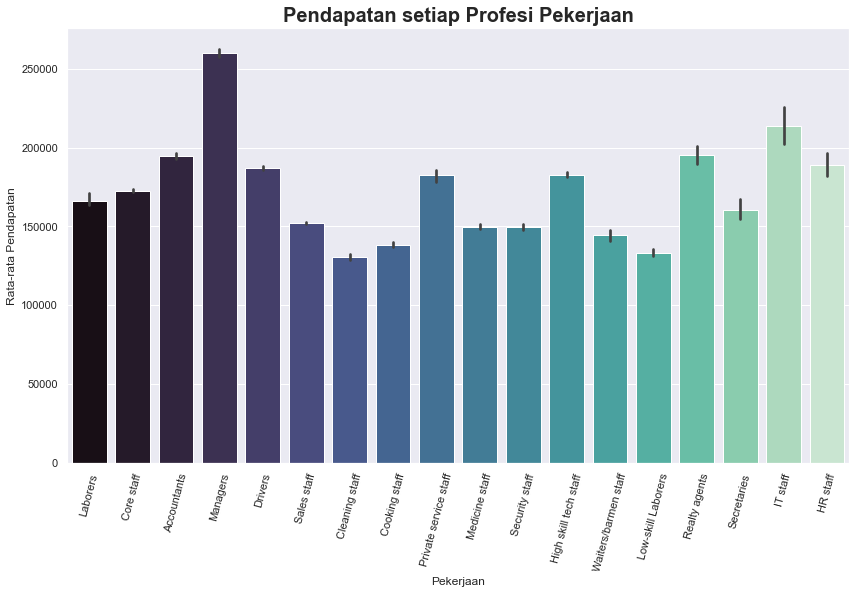

In [30]:
# Pendapatan peminjam pada setiap profesi 

plt.figure(figsize=(14,8))
plt.title("Pendapatan setiap Profesi Pekerjaan",fontsize=20,weight="bold")
sns.barplot(y='AMT_INCOME_TOTAL', x='OCCUPATION_TYPE',data=train,palette = "mako")
plt.xticks(rotation=75)
plt.xlabel("Pekerjaan")
plt.ylabel("Rata-rata Pendapatan")

Peminjam dengan profesi sebagai manager memiliki pendapatan yang tinggi, sedangkan peminjam yang berprofesi sebagai cleaning staff dan buruh dengan skill yang rendah memiliki pendapatan yang rendah.

sekarang, kita lihat rasio jumlah pembayar terhadap jumlah pelamar pinjaman di setiap kategori pekerjaan.

In [31]:
# data grouped berdasarkan pekerjaan dan target
pekerjaan = pd.DataFrame(data=train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])

# reset index dari data pekerjaan
pekerjaan = pekerjaan.reset_index()

In [32]:
# jumlah orang yang dikelompokkan berdasarkan jenis pekerjaan dan target
value_counts = pekerjaan['SK_ID_CURR'].values

def repayers_to_applicants_ratio(values):
    flag = 1
    rasio = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            rasio.append(current_number/(current_number+next_number))
            rasio.append(current_number/(current_number+next_number))
        flag=flag*-1
    return rasio        

In [33]:
pekerjaan['Rasio R/A'] = repayers_to_applicants_ratio(value_counts)

In [34]:
# rasio pekerjaan berdasarkan tipe pekerjaan yang aman untuk menjadi peminjam

df_rasio_pekerjaan = pekerjaan.groupby(['OCCUPATION_TYPE','Rasio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
df_rasio_pekerjaan = df_rasio_pekerjaan.reset_index() 
df_rasio_pekerjaan = df_rasio_pekerjaan.sort_values(['Rasio R/A'],ascending=False)
df_rasio_pekerjaan

,OCCUPATION_TYPE,Rasio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


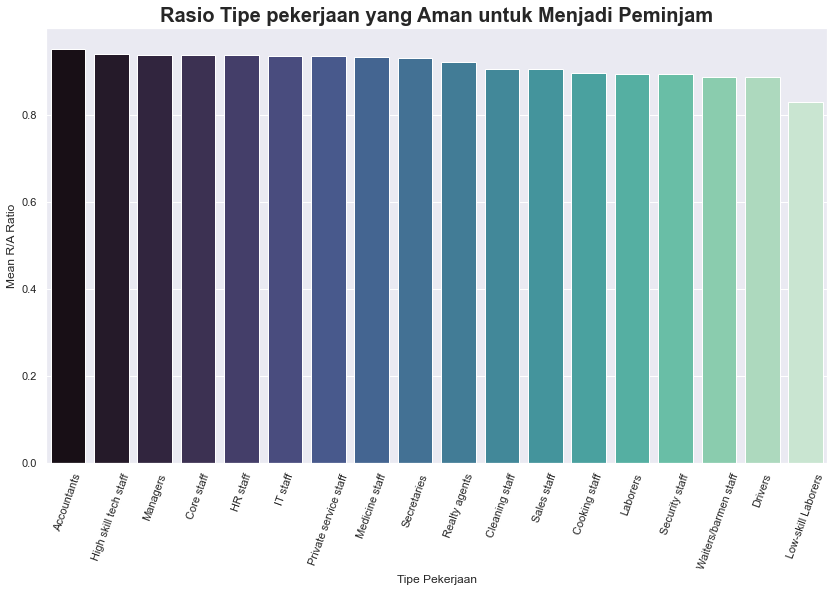

In [35]:
plt.figure(figsize=(14,8))
plt.title("Rasio Tipe pekerjaan yang Aman untuk Menjadi Peminjam",fontsize=20,weight="bold")
sns.barplot(x='OCCUPATION_TYPE',y='Rasio R/A',data=df_rasio_pekerjaan,palette=('mako'))
plt.xticks(rotation=70)
plt.xlabel("Tipe Pekerjaan")
plt.ylabel("Mean R/A Ratio")
plt.show()

Terlihat bahwa tipe pekerjaan akuntan yaitu tipe pekerjaan yang dikategorikan aman untuk diberikan pinjaman oleh lembaga peminjam dengan Rasio 0.95. Sedangkan tipe pekerjaan yang dikategorikan tidak aman untuk diberikan pinjaman adalah tipe pekerjaan buruh dengan keterampilan rendah (low-skill laborers) dengan rasio 0.82

Text(0.5, 0, 'Tahun Kerja')

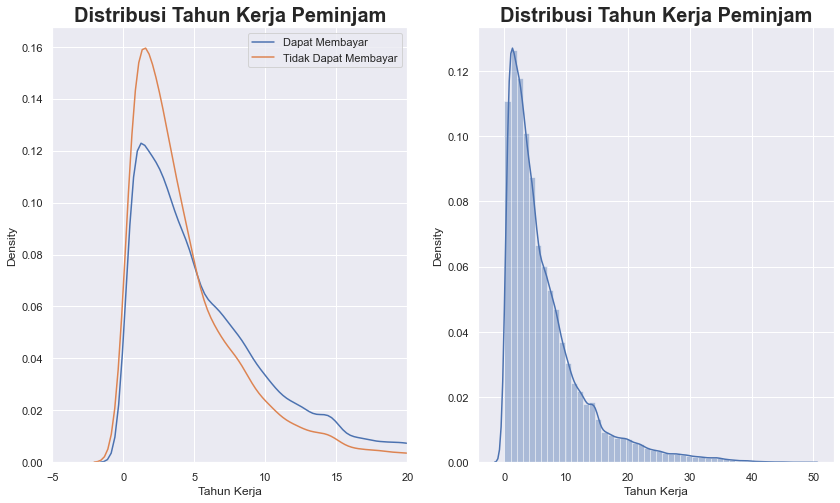

In [36]:
#Hubungan antara tahun berapa lama bekerja dan kemampuan membayar

days_empolyed_df = train[train['DAYS_EMPLOYED']!=365243]
days_empolyed_df['YEARS_EMPLOYED'] = days_empolyed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Distribusi Tahun Kerja Peminjam",fontsize=20,weight="bold")
sns.distplot(days_empolyed_df[days_empolyed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label="Dapat Membayar")
sns.distplot(days_empolyed_df[days_empolyed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label="Tidak Dapat Membayar")
plt.xlim([-5,20])
plt.xlabel("Tahun Kerja")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribusi Tahun Kerja Peminjam",fontsize=20,weight="bold")
sns.distplot(days_empolyed_df['YEARS_EMPLOYED'])
plt.xlabel("Tahun Kerja")


Peminjam dengan masa kerja < 5 tahun, terutama pekerja dengan masa kerja <2 tahun cenderung untuk tidak dapat membayarkan pinjaman yang ada,
sebaliknya peinjam dengan masa pinjaman >5 tahun dapat membayarkan pinjamannya.

In [37]:
# merge the new column 'Ratio R/A' to the train dataframe.
train = pd.merge(left=train,right=df_rasio_pekerjaan,on='OCCUPATION_TYPE')

In [38]:
# Mencari probabilitas bahwa pelamar akan mengetahui bahwa dia adalah laki-laki/Perempuan
pd.DataFrame(train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [39]:
print("probabilitas bahwa pemohon akan membayar kembali pinjaman dan dia adalah laki-laki P(R|M) = " , 73260/(73260+8576))
print("probabilitas bahwa pemohon akan membayar kembali pinjaman dan dia adalah Perempuan P(R|F) = " , 119311/(119311+9971))

probabilitas bahwa pemohon akan membayar kembali pinjaman dan dia adalah laki-laki P(R|M) =  0.8952050442348111
probabilitas bahwa pemohon akan membayar kembali pinjaman dan dia adalah Perempuan P(R|F) =  0.9228740273201219


In [40]:
# Mari kita buat kerangka data baru di mana probabilitas pembayaran berdasarkan jenis kelamin disertakan. GR/A untuk rasio pembayaran berdasarkan Gender.

gender_repay_rasio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})
gender_repay_rasio

,CODE_GENDER,GR/A
0,M,0.8952
1,F,0.9228


In [41]:
train = pd.merge(left=train,right=gender_repay_rasio,on='CODE_GENDER')

In [42]:
train['EGR/A'] = train['Rasio R/A']*train['GR/A']

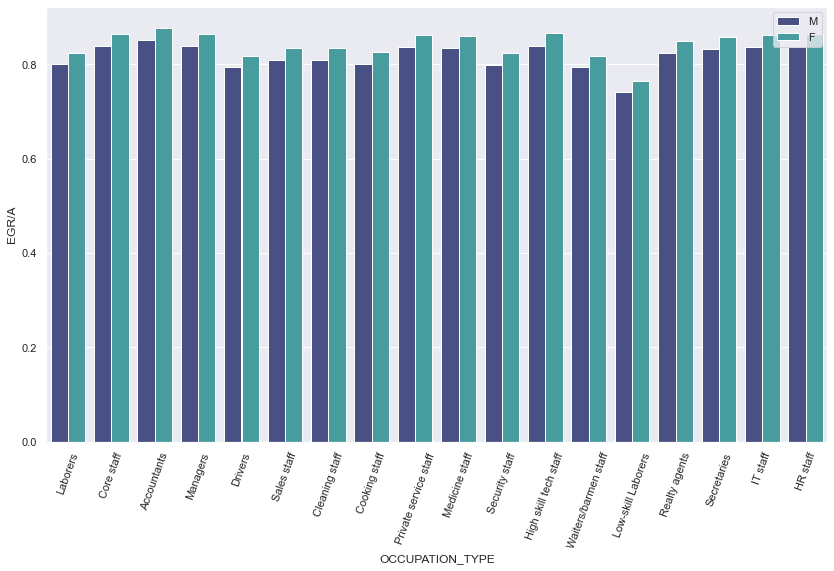

In [43]:
#Status Peminjam berdasrakn gender dan pekerjaan, probabilitas bahwa mereka akan membayakran pinjaman mereka

plt.figure(figsize=(14,8))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=train,palette="mako")
plt.legend(loc=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

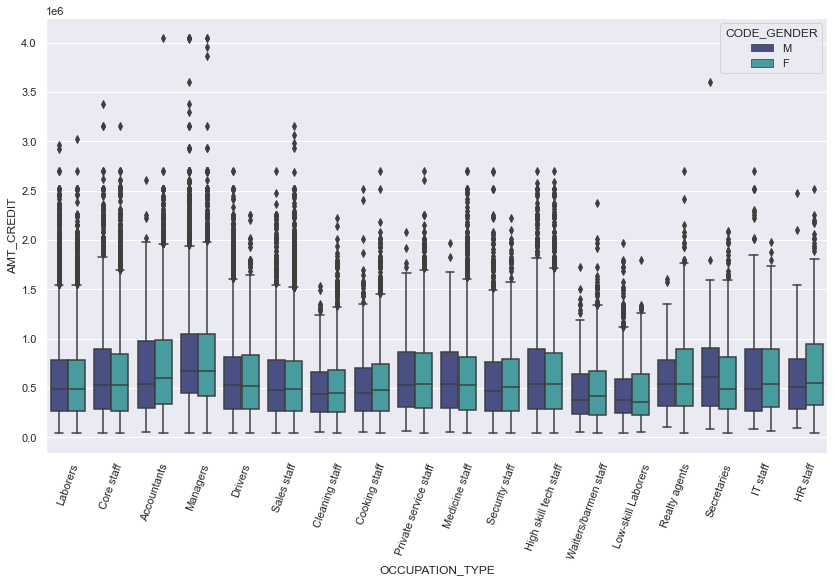

In [44]:
# kategori pekerjaan mana yang merupakan penerima pinjaman tertinggi?
plt.figure(figsize=(14,8))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=train,hue='CODE_GENDER',palette="mako")
plt.xticks(rotation=70)

Peminjam yang berprofesi sebagai Akuntan dan Manajer adalah penerima pinjaman dengan jumlah tertinggi, sedangkan pekerjaan buruh yang berketerampilan rendah adalah profesi yang mendapatkan pinjaman paling sedikit (Buruh merupakan profesi tertinggi sebagai yang mengajukan kredit, namun tidak untuk total pinjaman/kredit yang mereka dapatkan).

Hal ini masuk akal karena akuntan merupakan profesi yang ajuan kreditnya di terima paling banyak.

<AxesSubplot:title={'center':'Kepemilikan Mobil Peminjam'}, xlabel='CODE_GENDER', ylabel='count'>

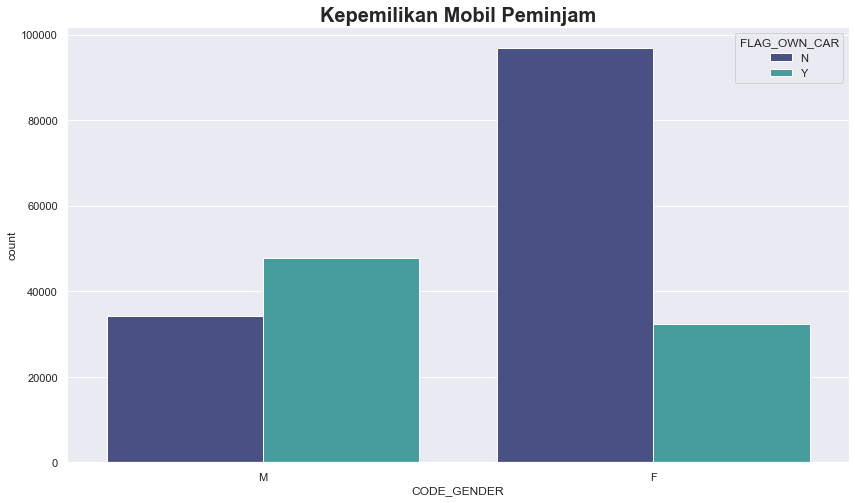

In [45]:
# siapa yan memiliki mobil terbanyak apakah perempuan atau laki-laki?
plt.figure(figsize=(14,8))
plt.title("Kepemilikan Mobil Peminjam",fontsize=20,weight="bold")
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train,palette="mako")

<AxesSubplot:title={'center':'Distribusi Mobil Peminjam'}, xlabel='OWN_CAR_AGE', ylabel='Density'>

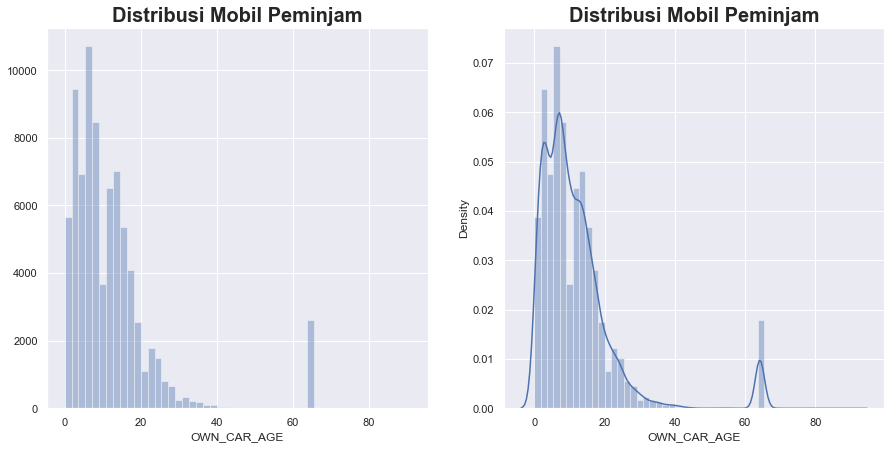

In [46]:
# Distribusi umur mobil Peminjam
plt.subplots(ncols=2,nrows=1,figsize=(15,7))
plt.title("Distribusi Mobil Peminjam",fontsize=20,weight="bold")
plt.subplot(1,2,1)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=False)
plt.title("Distribusi Mobil Peminjam",fontsize=20,weight="bold")
plt.subplot(1,2,2)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=True)

Terlihat distribusi umur mobil right skewwed dengan kebanyakan peminjam memiliki mobil yang berumur sekitar 10-20 tahun, dan ada sebagain banyak yang memiliki mobil yang berumur >60 thaun

<AxesSubplot:title={'center':'Umur Mobil Peminjam'}, xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

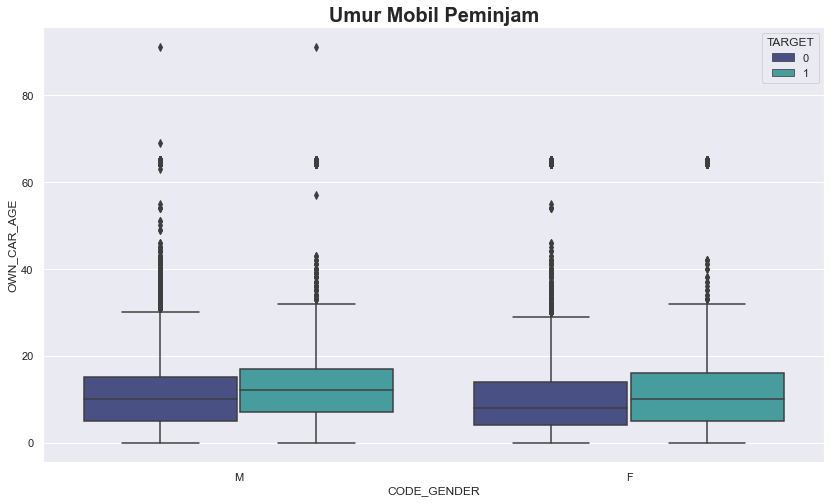

In [47]:
# Apakah peminjam menghabiskan uangnya untuk memperbaiki mobil mereka yang sudah tua?? - atau mereka membeli mobil yang baru?
plt.figure(figsize=(14,8))
plt.title("Umur Mobil Peminjam",fontsize=20,weight="bold")
sns.boxplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="mako")

Peminjam yang sulit membayar pinjaman mereka kebanyakan memiliki mobil yang sudah tua, hal ini mmungkin bisa menjadi asumsi jika mereka mengeluarkan uang mereka untuk menyewa mobil karena mobil yang mereka miliki sudah tua, atau bahkan mereka kebanyakan menghabiskan uang mereka untuk memperbaiki mobil tua mereka.

## DATA CLEANING AND DATA PROCESSING

In [48]:
#Test Data
test = pd.read_csv("application_train.csv")

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [50]:
test.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [51]:
# Check Missing value
feature = pd.DataFrame()
feature.index = test.columns
feature["unique_value"] = test.nunique()
feature["missing_%"] =  100 * test.isnull().sum() / len(test)
feature["type"] = test.dtypes
feature 

,unique_value,missing_%,type
SK_ID_CURR,307511,0.000000,int64
TARGET,2,0.000000,int64
NAME_CONTRACT_TYPE,2,0.000000,object
CODE_GENDER,3,0.000000,object
FLAG_OWN_CAR,2,0.000000,object
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,9,13.501631,float64
AMT_REQ_CREDIT_BUREAU_WEEK,9,13.501631,float64
AMT_REQ_CREDIT_BUREAU_MON,24,13.501631,float64
AMT_REQ_CREDIT_BUREAU_QRT,11,13.501631,float64


In [52]:
# Nan
print(f'Total Testing NaNs = {test.isnull().sum().sum()}')

Total Testing NaNs = 9152465


In [53]:
def missing_columns(dataframe):
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [54]:
#missing column train
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MODE,147666,0.699448,69.9
COMMONAREA_AVG,147666,0.699448,69.9
COMMONAREA_MEDI,147666,0.699448,69.9
NONLIVINGAPARTMENTS_MEDI,146756,0.695137,69.5
NONLIVINGAPARTMENTS_AVG,146756,0.695137,69.5
...,...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,696,0.003297,0.3
EXT_SOURCE_2,412,0.001952,0.2
AMT_GOODS_PRICE,221,0.001047,0.1
AMT_ANNUITY,12,0.000057,0.0


In [55]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
...,...,...,...
EXT_SOURCE_2,660,0.002146,0.2
AMT_GOODS_PRICE,278,0.000904,0.1
AMT_ANNUITY,12,0.000039,0.0
CNT_FAM_MEMBERS,2,0.000007,0.0


In [56]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 
print()

Train dataset: 
float64    68
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      41
object     16
dtype: int64



In [57]:
#Train Data yang asli dan tidak ada tambahan2 untuk EDA
train = pd.read_csv("application_train.csv")

# copy data train dan data test
train_copy = train.copy()
test_copy = test.copy()

In [58]:
#Data dengan kolom Nan saja
columns = train.isnull().sum()[train.isnull().sum() != 0].keys()
nans_count = train.isnull().sum()[train.isnull().sum() != 0].values
nans_percentage = train.isnull().sum()[train.isnull().sum() != 0].values/train.shape[0]

# buat dataframe dari data yang sudsh di ekstrak
nans = pd.DataFrame({'Column':columns, 'No. of NaNs':nans_count, '% of NaNs in Column':nans_percentage*100})
nans = nans.sort_values(by='% of NaNs in Column', ascending=False)

# extract kolom untuk Nan
drop = nans[nans['% of NaNs in Column']>30]['Column'].tolist()
keep = [col for col in train.columns if col not in drop]

# bikin data train baru
train = train[keep]

# hilangkan target dan simpan data test yang baru
keep.remove('TARGET')
test = test[keep]

In [59]:
# cek dataframe shape yang baru
print(train.shape)
print(test.shape)

(307511, 72)
(307511, 71)


In [60]:
# drop XNA
train = train[train['CODE_GENDER']!='XNA']

# check
train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [61]:
# DROP value yang salah di AMT_TOTAL
train = train[train['AMT_INCOME_TOTAL'] != 117000000.0]

In [62]:
#Ubah nilai yang salah di kolom DAYS_EMPLOYED dan DAYS_LAST_PHONE_CHANGE

# DAYS_EMPLOYED column

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
print(train['DAYS_EMPLOYED'].max())
print(test['DAYS_EMPLOYED'].max())

0.0
0.0


In [63]:
# DAYS_LAST_PHONE_CHANGE kolom
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)
test['DAYS_LAST_PHONE_CHANGE'] = test['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)

# check
print(train['DAYS_LAST_PHONE_CHANGE'].max())
print(test['DAYS_LAST_PHONE_CHANGE'].max())

-1.0
-1.0


# Split Data

In [64]:
X = train.drop('TARGET', axis=1)
y = train['TARGET']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fill NaN


In [66]:
#group data type (train)
cat= []
num= []

for col in X_train.columns:
    if train[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [67]:
# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (train)

for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

    
# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (test)

for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())

## Min Max Scaler

In [68]:
#make_pipeline
nums_= make_pipeline(MinMaxScaler())

## OneHot-Encoding


In [69]:
#make_pipeline
cat_= make_pipeline(OneHotEncoder(handle_unknown='ignore', drop='first'))

In [70]:
from sklearn.compose import ColumnTransformer, make_column_selector
#Aplikasikan ke kolom dengan tipe data(dtypes) tertentu
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ("num", nums_, make_column_selector(dtype_exclude="object")),
        ("cat", cat_, make_column_selector(dtype_include="object")),
    ]
)

# Model

Data target sangat imbalance, maka diperlukan perlakukan dengan cara melakukan oversampling dengan metode SMOTE lalu akan di undersampling untuk mengurangi sampel yang terlalu redundant

In [71]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over_ = SMOTE(sampling_strategy=0.25,random_state=42)                     
under_ = RandomUnderSampler(sampling_strategy=0.75, random_state=42)

In [72]:
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy :", metrics.accuracy_score(y_test, pred))
    print("Precision :", metrics.precision_score(y_test, pred))
    print("Recall :", metrics.recall_score(y_test, pred))
    print("F1 Score :", metrics.f1_score(y_test, pred))
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction
    print("ROC AUC score is: ",roc_auc_score(y_test,pred))

In [73]:
#Evaluasi ROC AUC
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_test)
    
    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_test)
    
    # evaluations
    print('Nilai ROC AUC data Train dan Test \n')
    print('Nilai ROC AUC Train= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Nilai ROC AUC Test= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Confusion Matrix:')
    print('Training :\n', confusion_matrix(y_train, train_pred))
    print('Validation :\n', confusion_matrix(y_test, test_pred))

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Logistic Regression

In [75]:
#model dan pipeline
log_reg= LogisticRegression()
log_reg_pipeline1= make_pipeline(preprocessor, over_, under_, log_reg)
log_reg_pipeline1.fit(X_train, y_train)

#train model
pred = log_reg_pipeline1.predict(X_test)

#evaluasi model
eval_regression(log_reg_pipeline1, pred, X_train, y_train, X_test, y_test)

Accuracy : 0.7639751552795031
Precision : 0.18137451530953336
Recall : 0.5443418940609952
F1 Score : 0.27208905826898
MAE: 0.24
RMSE: 0.49
R2 score: -2.17
ROC AUC score is:  0.6638426268493164


Nilai F1 score yang sangat tidak bagus
Nilai R2 yang lebih dari 1 menandakan model sangat underfit pada data test, dan bernilai negatif yang menandakan model menghasilkan perkiraan yang berbanding terbalik yang memiliki arti mengurangi target, dan itu bukan tujuan dari ini

## Decision Tree

In [76]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model_pipeline1= make_pipeline(preprocessor, over_, under_, dt_model)
dt_model_pipeline1.fit(X_train, y_train)

pred = dt_model_pipeline1.predict(X_test)

print("Accuracy :", metrics.accuracy_score(y_test,pred))
print("Precision :", metrics.precision_score(y_test, pred))
print("Recall :", metrics.recall_score(y_test, pred))

print("F1 Score :", metrics.f1_score(y_test, pred))
print("ROC AUC score is: ",roc_auc_score(y_test,pred))

Accuracy : 0.745227797470001
Precision : 0.12358204748819841
Recall : 0.35192616372391655
F1 Score : 0.18292746519267872
ROC AUC score is:  0.5659184942969346


nilai ROC AUC rendah


## Random Forest

In [77]:
# create pipeline
rf2 = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf2_pipeline5 = make_pipeline(preprocessor, over_, under_, rf2)

# train 
rf2_pipeline5.fit(X_train, y_train)

pred = rf2_pipeline5.predict(X_test)


# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))
evaluate_model(rf2_pipeline5)

The accuracy in general is :  0.8919872524470749


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     56518
           1       0.26      0.18      0.21      4984

    accuracy                           0.89     61502
   macro avg       0.59      0.57      0.58     61502
weighted avg       0.88      0.89      0.88     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.9972
Nilai ROC AUC Test= 0.7248

Confusion Matrix:
Training :
 [[219540   6624]
 [   339  19501]]
Validation :
 [[53959  2559]
 [ 4084   900]]


Model sangat underfit terlihat dari nilai ROC AUC dari data train yang bagus namun data test yang kurang bagus

## ADA Boost

In [78]:
# create pipeline
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_pipeline3 = make_pipeline(preprocessor, over_, under_, adaboost)

# train 
ada_pipeline3.fit(X_train, y_train)

pred = ada_pipeline3.predict(X_test)


# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))

# evaluate
evaluate_model(ada_pipeline3)

The accuracy in general is :  0.8792396995219668


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     56518
           1       0.26      0.26      0.26      4984

    accuracy                           0.88     61502
   macro avg       0.60      0.60      0.60     61502
weighted avg       0.88      0.88      0.88     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.7322
Nilai ROC AUC Test= 0.7272

Confusion Matrix:
Training :
 [[211023  15141]
 [ 14709   5131]]
Validation :
 [[52776  3742]
 [ 3685  1299]]


Nilai ROC dan AUC tidak menandakan adanya underfit atau overfit, bisa dipertimbangkan model ini

## XG Boost

In [79]:
# create pipeline
xgboost = XGBClassifier(random_state=42)
xgb_pipeline4 = make_pipeline(preprocessor, over_, under_, xgboost)

# train 
xgb_pipeline4.fit(X_train, y_train)

pred = xgb_pipeline4.predict(X_test)

# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))

# evaluate
evaluate_model(xgb_pipeline4)

The accuracy in general is :  0.8926864167018959


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     56518
           1       0.29      0.22      0.25      4984

    accuracy                           0.89     61502
   macro avg       0.61      0.59      0.60     61502
weighted avg       0.88      0.89      0.89     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.8193
Nilai ROC AUC Test= 0.7423

Confusion Matrix:
Training :
 [[217030   9134]
 [ 13993   5847]]
Validation :
 [[53787  2731]
 [ 3869  1115]]


Model yang sedikit underfit, dan nilainya pun cukup baik dari semua model

## Tambah Feature dengan korelasi yang tinggi dengan data target

In [80]:
column = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED']

for col in column:
    for i in [2,3]:
        X_train[f'{col}_power_{i}'] = X_train[col] ** i
        X_test[f'{col}_power_{i}'] = X_test[col] ** i
        test[f'{col}_power_{i}'] = test[col] ** i

## ADA Boost

In [81]:
# create pipeline
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_pipeline3 = make_pipeline(preprocessor, over_, under_, adaboost)

# train 
ada_pipeline3.fit(X_train, y_train)

pred = ada_pipeline3.predict(X_test)


# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))

# evaluate
evaluate_model(ada_pipeline3)

The accuracy in general is :  0.8762967057981854


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     56518
           1       0.25      0.27      0.26      4984

    accuracy                           0.88     61502
   macro avg       0.59      0.60      0.60     61502
weighted avg       0.88      0.88      0.88     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.7337
Nilai ROC AUC Test= 0.7276

Confusion Matrix:
Training :
 [[210270  15894]
 [ 14466   5374]]
Validation :
 [[52553  3965]
 [ 3643  1341]]


- ROC AUC yang tidak terjadi perbedaan
- Nilai True positif dan false negatif turun, false positif dan true negatif naik


## Logistic Regression

In [85]:
#model dan pipeline
log_reg= LogisticRegression()
log_reg_pipeline1= make_pipeline(preprocessor, over_, under_, log_reg)
log_reg_pipeline1.fit(X_train, y_train)

#train model
pred = log_reg_pipeline1.predict(X_test)

#evaluasi model
eval_regression(log_reg_pipeline1, pred, X_train, y_train, X_test, y_test)
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))

Accuracy : 0.7611459789925531
Precision : 0.18021876647337903
Recall : 0.5487560192616372
F1 Score : 0.2713293650793651
MAE: 0.24
RMSE: 0.49
R2 score: -2.21
ROC AUC score is:  0.6643157285876111


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     56518
           1       0.18      0.55      0.27      4984

    accuracy                           0.76     61502
   macro avg       0.57      0.66      0.56     61502
weighted avg       0.89      0.76      0.81     61502



## Random Forest

In [82]:
# create pipeline
rf2 = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf2_pipeline5 = make_pipeline(preprocessor, over_, under_, rf2)

# train 
rf2_pipeline5.fit(X_train, y_train)

pred = rf2_pipeline5.predict(X_test)


# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))
evaluate_model(rf2_pipeline5)

The accuracy in general is :  0.8731260772007414


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     56518
           1       0.24      0.26      0.25      4984

    accuracy                           0.87     61502
   macro avg       0.59      0.59      0.59     61502
weighted avg       0.88      0.87      0.88     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.9956
Nilai ROC AUC Test= 0.7229

Confusion Matrix:
Training :
 [[215287  10877]
 [   240  19600]]
Validation :
 [[52421  4097]
 [ 3706  1278]]


- Model masi sama underfit

## Decision Tree

In [84]:
dt_model = DecisionTreeClassifier()
dt_model_pipeline1= make_pipeline(preprocessor, over_, under_, dt_model)
dt_model_pipeline1.fit(X_train, y_train)

pred = dt_model_pipeline1.predict(X_test)

print("Accuracy :", metrics.accuracy_score(y_test,pred))
print("Precision :", metrics.precision_score(y_test, pred))
print("Recall :", metrics.recall_score(y_test, pred))

print("F1 Score :", metrics.f1_score(y_test, pred))
print("ROC AUC score is: ",roc_auc_score(y_test,pred))

Accuracy : 0.7471139149946343
Precision : 0.1228320605238741
Recall : 0.34530497592295345
F1 Score : 0.18120558041589893
ROC AUC score is:  0.5639260645211568


## XG Boost

In [90]:
# create pipeline
xgboost = XGBClassifier(random_state=42)
xgb_pipeline4 = make_pipeline(preprocessor, over_, under_, xgboost)

# train 
xgb_pipeline4.fit(X_train, y_train)

pred = xgb_pipeline4.predict(X_test)

# evaluate
print("The accuracy in general is : ", accuracy_score(y_test,pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,pred))

# evaluate
evaluate_model(xgb_pipeline4)

The accuracy in general is :  0.8945400149588631


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     56518
           1       0.30      0.22      0.25      4984

    accuracy                           0.89     61502
   macro avg       0.62      0.59      0.60     61502
weighted avg       0.88      0.89      0.89     61502

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.8169
Nilai ROC AUC Test= 0.7406

Confusion Matrix:
Training :
 [[217145   9019]
 [ 14098   5742]]
Validation :
 [[53907  2611]
 [ 3875  1109]]


- Nilai Akurasi naik, dan true positif naik, false negatif turun

# Model yang baik adalahh XG BOOST

# Business Metrics

In [87]:
scaler_AMT_CREDIT = MinMaxScaler()
scaler_AMT_CREDIT.fit(train['AMT_CREDIT'].values.reshape(len(train), 1))

train['AMT_CREDIT'] = scaler_AMT_CREDIT.inverse_transform(train['AMT_CREDIT'].values.reshape(len(train), 1))

In [89]:
X = train.drop(columns = ['TARGET'])
Y = train[['TARGET']]
XTrain, XTest, yTrain, yTest = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [91]:
XTest['TARGET_PRED_RESULT'] = pred
XTest['TARGET'] = yTest

### LGD Before Modelling

In [93]:
default = XTest.groupby(['TARGET'])['AMT_CREDIT'].sum().reset_index()
default

,TARGET,AMT_CREDIT
0,0,1.362371e+17
1,1,1.132497e+16


In [94]:
Total_default = XTest.groupby(['TARGET'])['AMT_CREDIT'].count().reset_index()
Total_default

,TARGET,AMT_CREDIT
0,0,56518
1,1,4984


In [95]:
LGDB = default['AMT_CREDIT'].loc[default['TARGET'] == 1]
LGDB

1    1.132497e+16
Name: AMT_CREDIT, dtype: float64

### LGD After Modelling

In [100]:
FN = (XTest.loc[(XTest['TARGET'] == 1) & (XTest['TARGET_PRED_RESULT'] == 0)])
FN.shape

(3875, 73)

In [97]:
LGDA = FN['AMT_CREDIT'].sum()
LGDA

9090299706930000.0

In [103]:
LGD = LGDA - LGDB
LGD

1   -2.234667e+15
Name: AMT_CREDIT, dtype: float64

In [99]:
LGD_Persentase = ((LGD)/LGDB)*100
LGD_Persentase

1   -19.73222
Name: AMT_CREDIT, dtype: float64